## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets , linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score , accuracy_score # r2 score : 判定係數

import warnings
warnings.filterwarnings('ignore')                   # 忽略警告訊息

In [135]:
# 讀取資料集 (因顯示方便我用 Df 物件顯示 ，其實 x 可以等於 dataset.data)
dataset = datasets.fetch_california_housing()
x = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [136]:
# 線性回歸模型訓練、預測

# 切割為訓練集、測試集
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.1 , random_state=6) 

# 設定線性回歸模型
lr = linear_model.LinearRegression()

# 訓練模型
lr.fit(train_X, train_Y)

# 預測資料
pred_Y = lr.predict(test_X)

In [137]:
print(" 線性回歸公式係數 : ",lr.coef_)

 線性回歸公式係數 :  [ 4.36763341e-01  9.36000189e-03 -1.06661614e-01  6.44356843e-01
 -4.29865462e-06 -4.26541835e-03 -4.20993923e-01 -4.34260905e-01]


In [138]:
mse_score = mean_squared_error(test_Y , pred_Y)
print("MSE的分數 : " ,mse_score)

MSE的分數 :  0.4978601824311583


##
##

## 使用 Lasso Regression 模型

In [139]:
Lasso = linear_model.Lasso(alpha=1)
Lasso.fit(train_X, train_Y)
pred_Y = Lasso.predict(test_X)
print(" Lasso 回歸公式係數 : ",Lasso.coef_)
print("MSE的分數 : " ,mean_squared_error(test_Y, pred_Y))

 Lasso 回歸公式係數 :  [ 1.44556972e-01  5.74739740e-03  0.00000000e+00 -0.00000000e+00
 -5.89070982e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
MSE的分數 :  0.9303988560904349


## 可以明顯發現，使用 Lasso 後，很多feature的係數(weight) 都變成 0 (等於 feature 沒作用)
## 所以 Lasso 也可以拿來篩選 feature

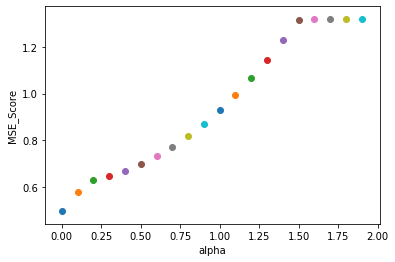

In [140]:
# 不同alpha 值對結果的影響

for i in range(20):
    i/=10
    Lasso = linear_model.Lasso(alpha=i)
    Lasso.fit(train_X, train_Y)
    pred_Y = Lasso.predict(test_X)
    score = mean_squared_error(test_Y, pred_Y)
    plt.scatter(i , score)
plt.xlabel('alpha')
plt.ylabel('MSE_Score')
plt.show()



##
##

## 使用 Ridge regression 

In [141]:
Ridge = linear_model.Ridge(alpha=1)
Ridge.fit(train_X,train_Y)
pred_Y = Ridge.predict(test_X)
print(" Ridge 回歸公式係數 : ",Ridge.coef_)
print("MSE的分數 : " ,mean_squared_error(test_Y, pred_Y))

 Ridge 回歸公式係數 :  [ 4.36652773e-01  9.36180058e-03 -1.06450638e-01  6.43240452e-01
 -4.29147057e-06 -4.26503741e-03 -4.20978489e-01 -4.34229898e-01]
MSE的分數 :  0.4978608369731848


## 從以上的 Lasso 和 Ridge regression 的結果來看，並沒有比 linear regression 好
## 所以正規化應該在 overfitting 時使用，才有一定效果
## 且可以發現 Ridge 和 lr 的差別並不會差太多

##
##


##
##

##
##

# 資料集 2 

In [142]:
dataset = datasets.load_boston()
x = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [143]:
# 線性回歸
train_X,test_X,train_Y,test_Y = train_test_split(x , y, test_size=0.1 , random_state=6)

lr = linear_model.LinearRegression()
lr.fit(train_X, train_Y)
pred_Y = lr.predict(test_X)
print("預測分數 : ",mean_squared_error(test_Y,pred_Y))
print("係數(w) : \n",lr.coef_)

預測分數 :  33.45326510475576
係數(w) : 
 [-8.78773569e-02  5.11074139e-02 -2.39104735e-02  2.76363757e+00
 -1.70601531e+01  3.60517391e+00  2.02007557e-03 -1.53434651e+00
  3.21018778e-01 -1.32505535e-02 -9.12058667e-01  9.44834844e-03
 -5.26052290e-01]


[-0.0493216   0.05631364 -0.02731795  0.         -0.          0.83794345
  0.01872881 -0.75617721  0.29485779 -0.01702832 -0.68363004  0.00830298
 -0.74891897] 

 40.77249091080072


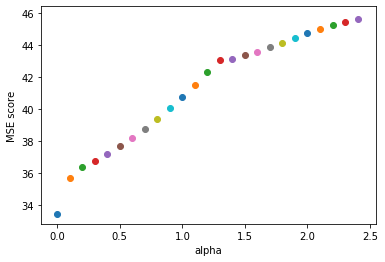

In [144]:
# Lasso regression
for i in range(25):
    i/=10
    Lasso = linear_model.Lasso(alpha=i)         # 嘗試不同 alpha 值
    Lasso.fit(train_X,train_Y)
    pred_Y = Lasso.predict(test_X)
    score = mean_squared_error(test_Y,pred_Y)
    if i==1 : print(Lasso.coef_,"\n\n",score)                # 印出 alpha==1 的係數、分數

    plt.scatter(i , score)
plt.xlabel("alpha")
plt.ylabel("MSE score")
plt.show()

[-8.29800061e-02  5.19882158e-02 -5.25153502e-02  2.55994263e+00
 -9.96969254e+00  3.65708835e+00 -4.59820158e-03 -1.42651986e+00
  3.04444282e-01 -1.37819738e-02 -8.34642641e-01  9.86197281e-03
 -5.34853765e-01] 

 33.927817913208834


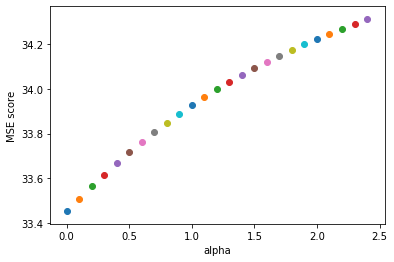

In [145]:
# Ridge regression
for i in range(25):
    i /= 10
    Ridge = linear_model.Ridge( alpha=i )           # 使用不同 alpha 值
    Ridge.fit(train_X,train_Y)
    pred_Y = Ridge.predict(test_X)
    score = mean_squared_error(test_Y, pred_Y)
    if i==1 : print(Ridge.coef_,"\n\n",score)                    # 印出 alpha==1 的係數、分數

    plt.scatter(i , score)
plt.xlabel("alpha")
plt.ylabel("MSE score")
plt.show()